In [18]:
from __future__ import print_function
import numpy as np
from sklearn.utils import shuffle
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import time
import random
from random import sample 
import matplotlib.pyplot as plt
import sklearn
from sklearn import tree

In [28]:
def encode(dataset):
    dataset.species.replace(['setosa', 'versicolor','virginica'], [-1,-1,1], inplace=True)
    return dataset

In [29]:
def erf(weights,indicator): 
    total_sum  = sum(weights)

    inc_sum = 0
    for i in range(len(weights)): 
        if(indicator[i]==0):
            inc_sum+=weights[i]
    
    err = 1.0*inc_sum/total_sum
    return err
    

In [30]:
def update_weights(weights,indicator):

    err = erf(weights,indicator)
    alpha = 0.5*np.log((1-err)/err)
    new_weights = np.zeros(len(weights))
    for i in range(len(indicator)): 
        if(indicator[i]==1):
            new_weights[i] = 1.0*weights[i]*np.exp(-alpha)
        if(indicator[i]==0): 
            new_weights[i] = 1.0*weights[i]*np.exp(alpha)
    
    return 1.0*new_weights/sum(new_weights)
        
     

            

In [31]:
def evaluate(clf,X,Y):
    indicator = np.zeros(len(X))
    pred_array = []
    for index in range(len(X)):
        pred_array.append(np.sign(clf.predict([X[index]])[0]))
        if(np.sign(clf.predict([X[index]])[0])==np.sign(Y[index])):
            indicator[index] = 1
      
    return np.asarray(pred_array),indicator

In [32]:
def ADA(clf,weights,X,Y,i): 
    clf.fit(X,Y*weights)
    pred_array,indicator = evaluate(clf,X,Y)
    accuracy = 1.0*sum(indicator)/len(indicator)
    
    plot(X,Y,weights,pred_array)
    weights = update_weights(weights,indicator)
    plt.title('Iteration'+ str(i)+ 'Accuracy '+str(accuracy))
    plt.show()
    return weights
    

In [48]:
def plot(X,Y,weight,pred_array):
    x = X[:,0]
    y = X[:,1]
    area_array = 10**3*weight
    print(pred_array)
    color_array = (np.sign(pred_array)+1)*200
    plt.scatter(x,y,s = area_array,c = color_array)
    

In [45]:
def initialize_weights(X): 
    return 1.0*np.ones(len(X))/len(X)

In [50]:

clf = tree.DecisionTreeRegressor(max_depth = 1,splitter = 'best', random_state = 0)
dataset = pd.read_csv('iris.csv')
dataset = encode(dataset)
X = np.asarray(dataset[['sepal_length','petal_width']].values.tolist())
Y = np.asarray(dataset['species'].values.tolist())
weights_initial = initialize_weights(X)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.
  1.  1.  1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]


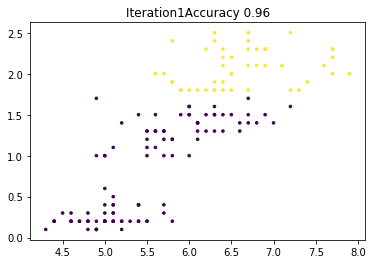

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1.
  1. -1.  1. -1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1.  1. -1.  1. -1.
  1. -1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1.
 -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]


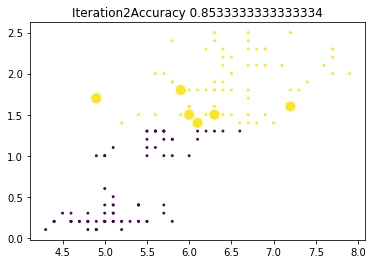

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1.
  1. -1.  1. -1.  1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1. -1.  1.
  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1.  1.  1.  1. -1. -1.
 -1.  1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1. -1.]


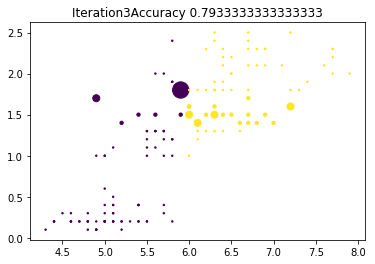

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.]


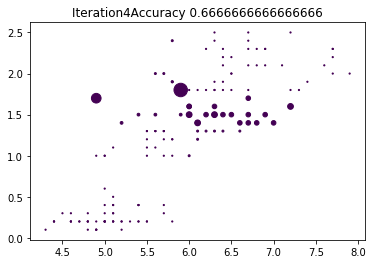

[-1.  1.  1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1.  1. -1.  1. -1. -1. -1. -1.  1.  1. -1. -1. -1.  1. -1.
 -1.  1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.]


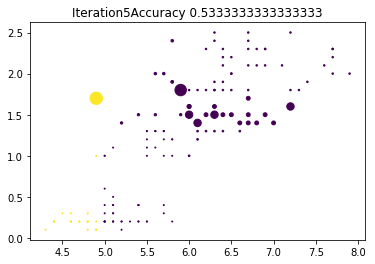

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1.
  1. -1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.  1. -1.  1. -1.
  1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.]


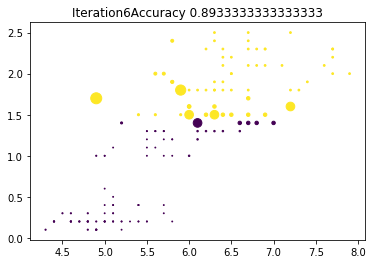

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1.
 -1.  1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1.  1. -1. -1.  1.
 -1. -1. -1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.]


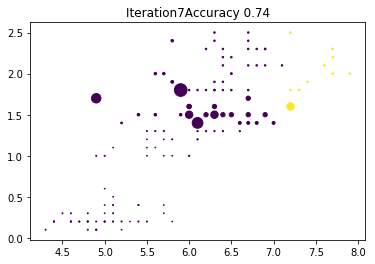

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1.
  1. -1.  1. -1.  1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1. -1.  1.
  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1.  1.  1.  1. -1. -1.
 -1.  1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1. -1.]


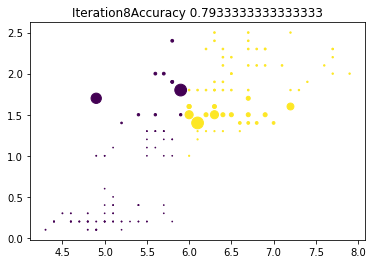

In [51]:
#Performing ADABOOST iteration.
weights = weights_initial
weight1 = ADA(clf,weights,X,Y,1)
weight2 = ADA(clf,weight1,X,Y,2)
weight3 = ADA(clf,weight2,X,Y,3)
weight4 = ADA(clf,weight3,X,Y,4)
weight5 = ADA(clf,weight4,X,Y,5)
weight6 = ADA(clf,weight5,X,Y,6)
weight7 = ADA(clf,weight6,X,Y,7) 
weight8 = ADA(clf,weight7,X,Y,8) 

In [52]:
def add_false(X,Y): 
    X.append([5.0,3.6]) 
    X.append([5.1,3.4])
    X.append([6.6,3.0])
    X.append([6.9,3.2])
    Y.append(-1)
    Y.append(-1) 
    Y.append(1)
    Y.append(1)
    return X,Y

In [53]:
#Adding False Columns;
dataset = pd.read_csv('iris.csv')
dataset = encode(dataset)
X = dataset[['sepal_length','petal_width']].values.tolist()
Y = dataset['species'].values.tolist()
X_f,Y_f = add_false(X,Y)

X_f,Y_f = np.asarray(X_f),np.asarray(Y_f)

weights_initial = initialize_weights(X) 

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.
  1.  1.  1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


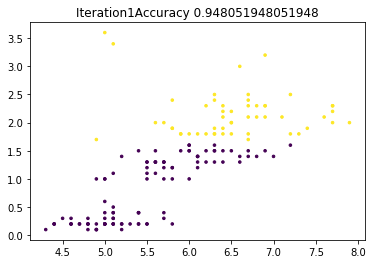

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


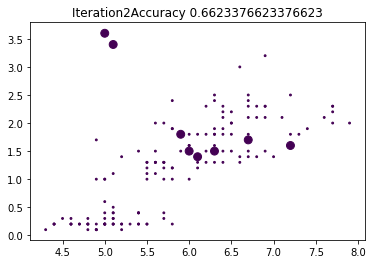

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.]


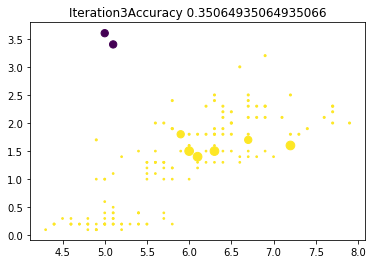

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


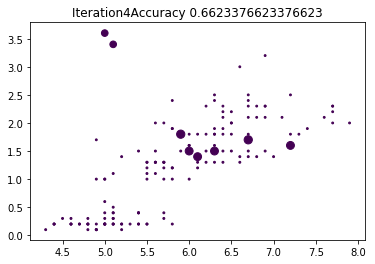

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1.
  1. -1.  1. -1.  1. -1. -1. -1.  1.  1. -1.  1. -1. -1.  1. -1. -1.  1.
  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1.  1.  1.  1. -1. -1.
 -1.  1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.]


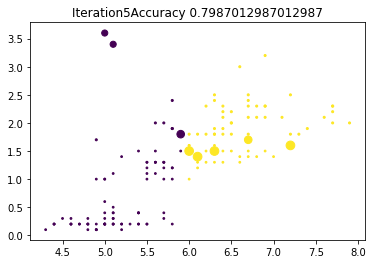

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.
  1.  1.  1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


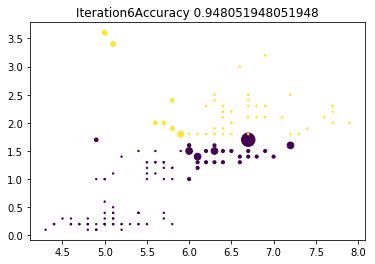

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.]


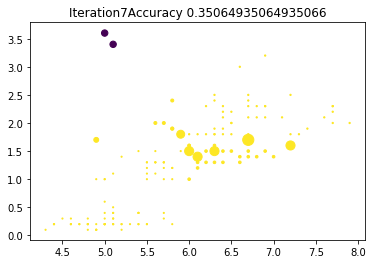

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


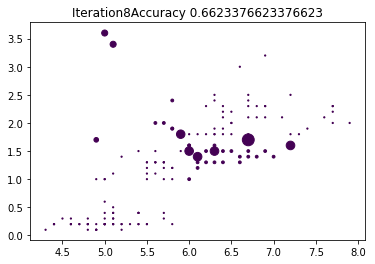

In [54]:
weights = weights_initial
weight1 = ADA(clf,weights,X_f,Y_f,1)
weight2 = ADA(clf,weight1,X_f,Y_f,2)
weight3 = ADA(clf,weight2,X_f,Y_f,3)
weight4 = ADA(clf,weight3,X_f,Y_f,4)
weight5 = ADA(clf,weight4,X_f,Y_f,5)
weight6 = ADA(clf,weight5,X_f,Y_f,6)
weight7 = ADA(clf,weight6,X_f,Y_f,7) 
weight8 = ADA(clf,weight7,X_f,Y_f,8) 